# Exercise: Drone delivery system
# Ville Seeste 1503540

In [118]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

            x           y
0  622.771572  164.857623
1  416.357298  630.193634
2  292.735020  567.333231
3  737.211288  166.225676
4  540.475375  682.912298
5  535.469492  318.439661
6  640.380050  870.833221
7  235.772075  359.048203
8  481.896884  661.491838
9  730.032789  312.177817
                 x            y
count  5956.000000  5956.000000
mean    508.823177   427.554772
std     271.061462   289.044640
min       0.017692     0.043285
25%     282.582920   170.079921
50%     518.100892   397.786441
75%     727.156497   669.982518
max     999.533215   999.731720


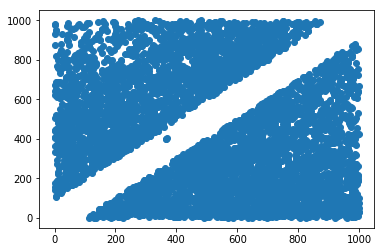

In [119]:
# Load the file and drop id column

df = pd.read_csv('drone_delivery_v1.csv', sep=';')
df = df.drop(['clientid'], axis=1)
print(df.head(10))
print(df.describe())
colnames = df.columns.get_values()
plt.scatter(df['x'], df['y'])
plt.show()

There migth be river or somekind of road going across the living area.

In [120]:
# I think that in this example it's not necessary to scale values 

#scaler = StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df))

            x           y
0  699.440419  210.215564
1  551.615648  786.815041
2  195.897098  388.620128


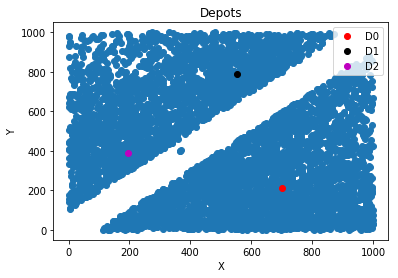

In [121]:
# Finding the 3 depots and plotting them

num_clusters = 3
kmeans = cluster.KMeans(n_clusters=num_clusters)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=colnames)
print(centroids_df)

# Plot stuff
plt.scatter(df['x'], df['y'], label='')
plt.plot(centroids_df['x'][0],centroids_df['y'][0], 'ro', label='D0')
plt.plot(centroids_df['x'][1],centroids_df['y'][1], 'ko', label='D1')
plt.plot(centroids_df['x'][2],centroids_df['y'][2], 'mo', label='D2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Depots')
plt.legend()
plt.show()

In [122]:
# Add nearest depot to each customer data

labels = kmeans.predict(df)
df_copy = df.copy()
df_copy['cluster_id'] = labels
df_copy.head(10)

,x,y,cluster_id
0,622.771572,164.857623,0
1,416.357298,630.193634,1
2,292.735020,567.333231,2
3,737.211288,166.225676,0
4,540.475375,682.912298,1
5,535.469492,318.439661,0
6,640.380050,870.833221,1
7,235.772075,359.048203,2
8,481.896884,661.491838,1
9,730.032789,312.177817,0


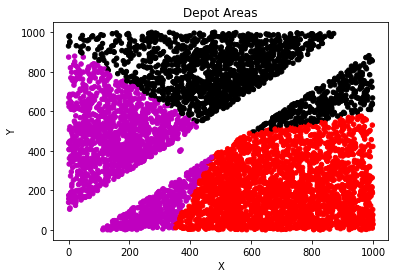

In [123]:
# Plotting the depot areas

colors = np.where(df_copy["cluster_id"]==0,'r','-')
colors[df_copy["cluster_id"]==1] = 'k'
colors[df_copy["cluster_id"]==2] = 'm'
df_copy.plot.scatter(x='x',y='y',c=colors)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Depot Areas')
plt.show()

            x           y
0  247.280155  765.703802
1  554.885840  199.243978
2  824.106092  544.951878
3  842.606913  144.226593
4  169.027598  449.684799
5  277.767415   95.835261
6  572.865473  834.988462


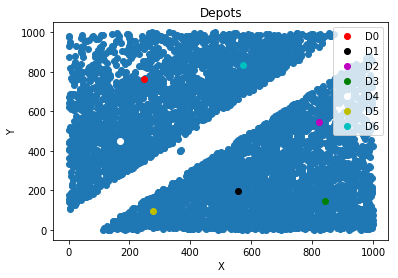

In [124]:
# test different number of depots

num_clusters = 7
kmeans = cluster.KMeans(n_clusters=num_clusters)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=colnames)
print(centroids_df)

# Plot stuff
plt.scatter(df['x'], df['y'], label='')
plt.plot(centroids_df['x'][0],centroids_df['y'][0], 'ro', label='D0')
plt.plot(centroids_df['x'][1],centroids_df['y'][1], 'ko', label='D1')
plt.plot(centroids_df['x'][2],centroids_df['y'][2], 'mo', label='D2')
plt.plot(centroids_df['x'][3],centroids_df['y'][3], 'go', label='D3')
plt.plot(centroids_df['x'][4],centroids_df['y'][4], 'wo', label='D4')
plt.plot(centroids_df['x'][5],centroids_df['y'][5], 'yo', label='D5')
plt.plot(centroids_df['x'][6],centroids_df['y'][6], 'co', label='D6')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Depots')
plt.legend()
plt.show()

In [125]:
labels = kmeans.predict(df)
df_copy2 = df.copy()
df_copy2['cluster_id'] = labels
df_copy2.head(10)

,x,y,cluster_id
0,622.771572,164.857623,1
1,416.357298,630.193634,0
2,292.735020,567.333231,4
3,737.211288,166.225676,3
4,540.475375,682.912298,6
5,535.469492,318.439661,1
6,640.380050,870.833221,6
7,235.772075,359.048203,4
8,481.896884,661.491838,6
9,730.032789,312.177817,3


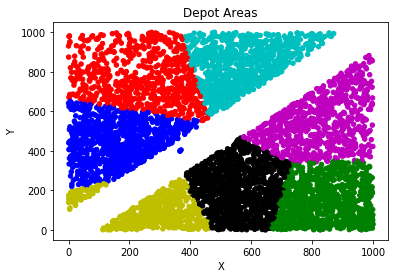

In [126]:
colors = np.where(df_copy2["cluster_id"]==0,'r','-')
colors[df_copy2["cluster_id"]==1] = 'k'
colors[df_copy2["cluster_id"]==2] = 'm'
colors[df_copy2["cluster_id"]==3] = 'g'
colors[df_copy2["cluster_id"]==4] = 'b'
colors[df_copy2["cluster_id"]==5] = 'y'
colors[df_copy2["cluster_id"]==6] = 'c'
df_copy2.plot.scatter(x='x',y='y',c=colors)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Depot Areas')
plt.show()

There was not much difference in compute time between 3 an 7 depots

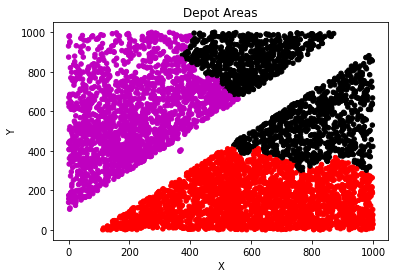

In [127]:
# agglomerative hierarchical clustering 

num_clusters = 3
agglo = cluster.AgglomerativeClustering(n_clusters=num_clusters)
agglo_labels = agglo.fit_predict(df)

df_copy3 = df.copy()
df_copy3['cluster_id'] = agglo_labels
colors = np.where(df_copy3["cluster_id"]==0,'r','-')
colors[df_copy3["cluster_id"]==1] = 'k'
colors[df_copy3["cluster_id"]==2] = 'm'
df_copy3.plot.scatter(x='x',y='y',c=colors)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Depot Areas')
plt.show()

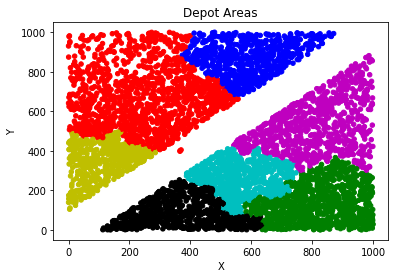

In [128]:
num_clusters = 7
agglo = cluster.AgglomerativeClustering(n_clusters=num_clusters)
agglo_labels = agglo.fit_predict(df)

df_copy4 = df.copy()
df_copy4['cluster_id'] = agglo_labels
colors = np.where(df_copy4["cluster_id"]==0,'r','-')
colors[df_copy4["cluster_id"]==1] = 'k'
colors[df_copy4["cluster_id"]==2] = 'm'
colors[df_copy4["cluster_id"]==3] = 'g'
colors[df_copy4["cluster_id"]==4] = 'b'
colors[df_copy4["cluster_id"]==5] = 'y'
colors[df_copy4["cluster_id"]==6] = 'c'
df_copy4.plot.scatter(x='x',y='y',c=colors)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Depot Areas')
plt.show()

Results were little bit different compared to k-means clustering. Agglomerative clustering lines between depots were not as straigth as in the k-means.